# CALORİES

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("calories.csv")

In [59]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [60]:
df.shape

(15000, 9)

In [61]:
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

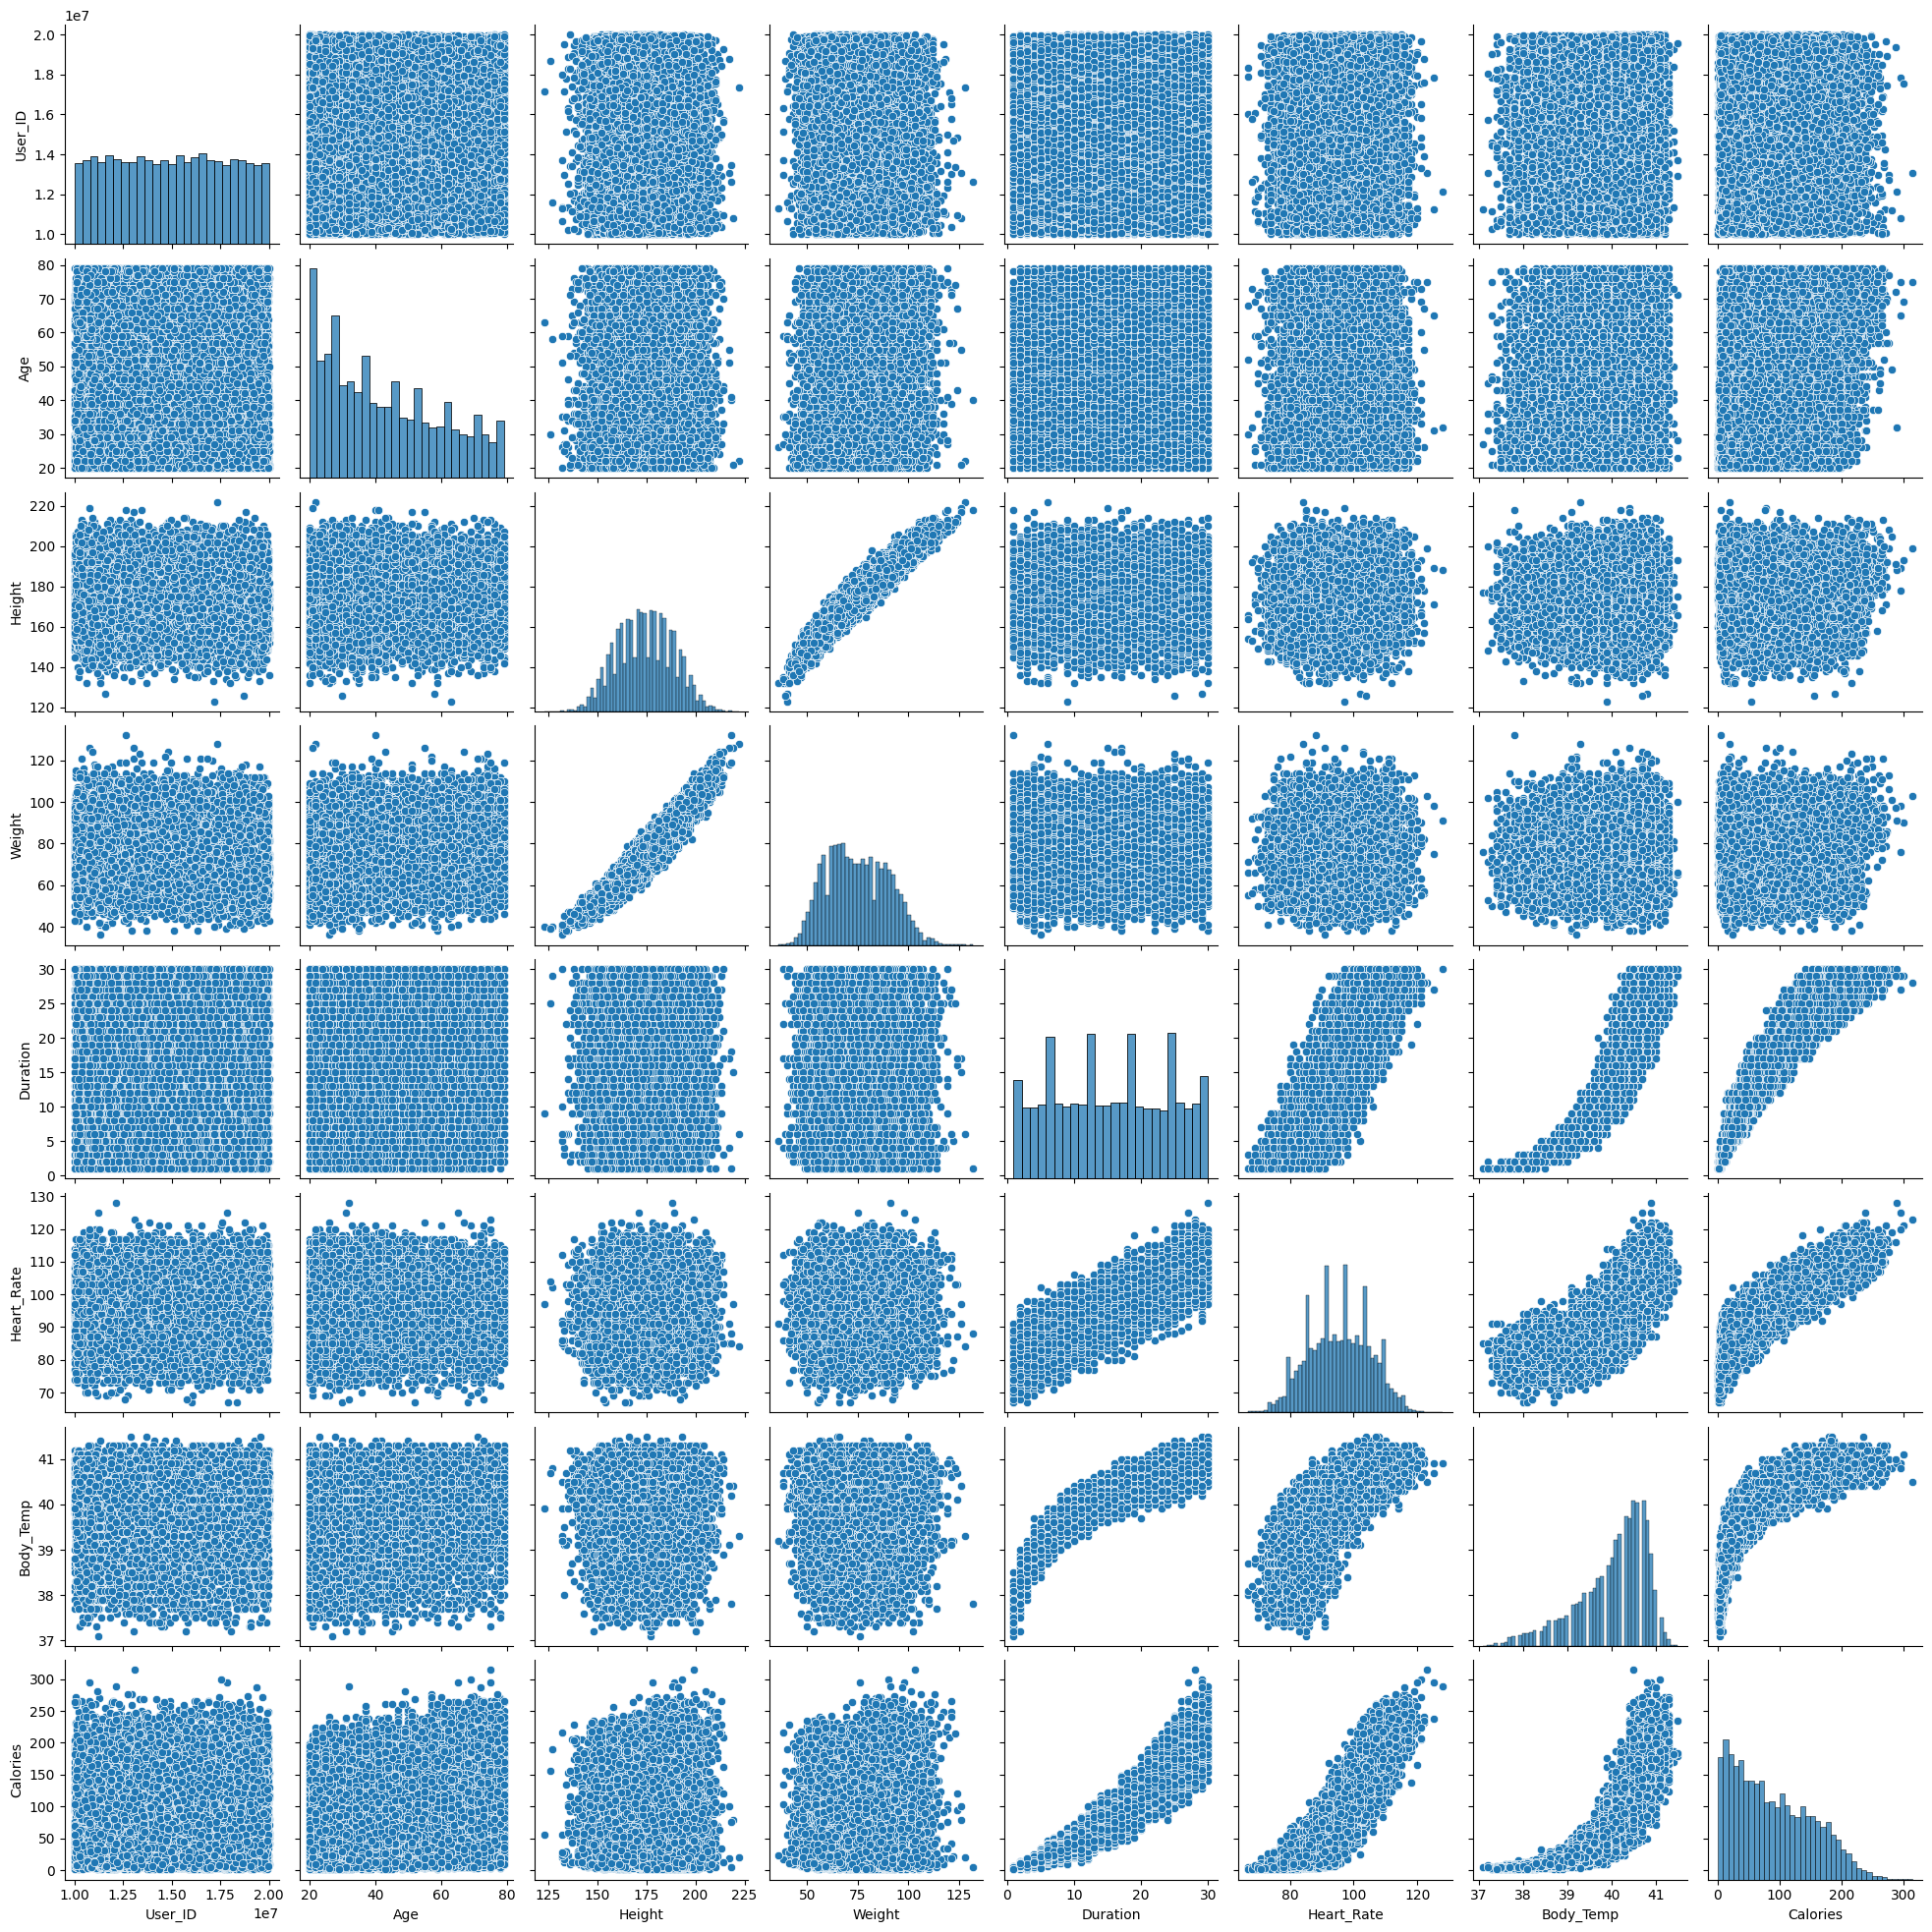

In [62]:
sns.pairplot(df)

<Axes: >

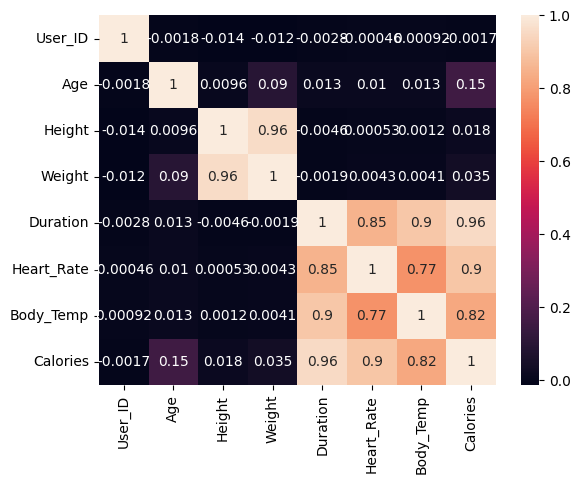

In [63]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [64]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# RANDOM FOREST

In [65]:
x = pd.get_dummies(df.drop("Calories" , axis=1))
y = df["Calories"]

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size=0.1, random_state=9)

# Veri büyük olduğundan test_size ı küçük girdik
# Diğer verilerin 4 katı büyük veriye sahibiz

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [69]:

bootstrap = [True, False]
oob = [True, False]

parameters={
    "bootstrap":bootstrap,
    "oob_score":oob
    }

In [107]:
random = RandomForestRegressor()

In [108]:
grid = GridSearchCV(random,parameters)

In [109]:
grid.fit(X_train,y_train)

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packag

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'oob_score': [True, False]})

In [110]:
grid.best_estimator_

RandomForestRegressor(oob_score=True)

In [111]:
grid.best_params_

{'bootstrap': True, 'oob_score': True}

In [112]:
random_pred = grid.predict(X_test)

* Değerlendirelim

In [115]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [116]:
mae = mean_absolute_error(y_test , random_pred)
rmse = np.sqrt(mean_squared_error(y_test , random_pred))
r2= r2_score(y_test, random_pred)

In [117]:
print("Mae :", mae)
print("Rmse :", rmse)
print("Rr2  :",r2 )

Mae : 1.7558799999999999
Rmse : 2.737647505919392
Rr2  : 0.9980921060336719



# POLY REGR

In [76]:
x = df.drop("Calories" , axis=1)
x = pd.get_dummies(x, drop_first=True)
y=df["Calories"]

In [77]:
print(x.dtypes)

User_ID          int64
Age              int64
Height         float64
Weight         float64
Duration       float64
Heart_Rate     float64
Body_Temp      float64
Gender_male       bool
dtype: object


In [78]:
from sklearn.preprocessing import PolynomialFeatures

In [79]:
poly_feat = PolynomialFeatures(degree=4 , include_bias=False)

In [80]:
poly_conv = poly_feat.fit_transform(x)

* TRAİN TEST SPLİT

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    poly_conv, y, test_size=0.1, random_state=42)

* LINN REGR

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lineer = LinearRegression(fit_intercept=True)

In [85]:
lineer.fit(X_train , y_train)

LinearRegression()

In [86]:
pred = lineer.predict(X_test)

In [87]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [88]:
mae = mean_absolute_error(y_test , pred)
rmse = np.sqrt(mean_squared_error(y_test , pred))
r2= r2_score(y_test, pred)

In [89]:
print("Mae :", mae)
print("Rmse :", rmse)
print("Rr2  :",r2 )

Mae : 22.773911171793113
Rmse : 30.508625222328085
Rr2  : 0.7630566887150345


* En iyi derece

In [90]:
train_rmse =[]
test_rmse =[]

for d in range(1,6):
    poly= PolynomialFeatures(degree=d , include_bias=False)
    poly_feat = poly.fit_transform(x)

    X_train, X_test, y_train, y_test = train_test_split(
    poly_feat, y, test_size=0.1, random_state=42)

    lineer = LinearRegression(fit_intercept=True)
    lineer.fit(X_train,y_train)
    pred = lineer.predict(X_test)
    
    train_RMSE = np.sqrt(mean_squared_error(y_test, pred)) 

    test_RMSE = np.sqrt(mean_squared_error(y_test, pred))

    # Hesaplanan RMSE değerlerini listelere ekle
    train_rmse.append(train_RMSE)
    test_rmse.append(test_RMSE)
    
    

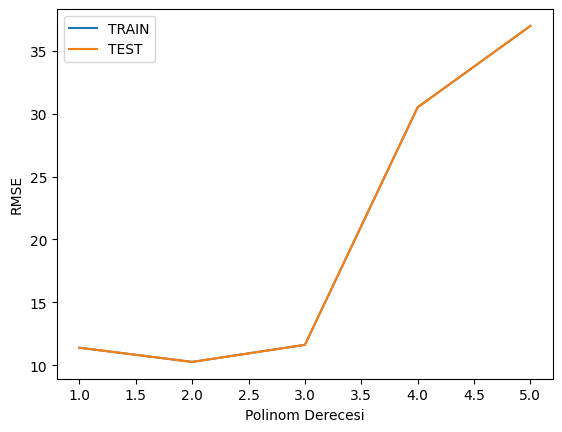

In [91]:
plt.plot(range(1,6),train_rmse[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse[:5],label='TEST')
plt.xlabel("Polinom Derecesi")
plt.ylabel("RMSE")
plt.legend()

* 2 yi deneyelim


In [92]:
x = df.drop("Calories" , axis=1)
x = pd.get_dummies(x, drop_first=True)
y=df["Calories"]

#print(x.dtypes)

from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=2 , include_bias=False)
poly_conv = poly_feat.fit_transform(x)

# TRAİN TEST SPLİT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    poly_conv, y, test_size=0.1, random_state=42)

# LINN REGR
from sklearn.linear_model import LinearRegression

lineer = LinearRegression(fit_intercept=True)
lineer.fit(X_train , y_train)

pred = lineer.predict(X_test)

from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

mae = mean_absolute_error(y_test , pred)
rmse = np.sqrt(mean_squared_error(y_test , pred))

r2= r2_score(y_test, pred)
print("Mae :", mae)
print("Rmse :", rmse)
print("Rr2  :",r2 )

Mae : 7.724135214162401
Rmse : 10.258156692156595
Rr2  : 0.9732121514615185


# LİNEER REGR DENEYELİM

In [93]:
x = df.drop("Calories" , axis=1)
x = pd.get_dummies(x, drop_first=True)

y= df["Calories"]

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
  x, y, test_size=0.1, random_state=42)

In [96]:
regr = LinearRegression()

In [97]:
regr.fit(X_train,y_train)

LinearRegression()

In [98]:
pred = regr.predict(X_test)

In [99]:
mae = mean_absolute_error(y_test , pred)
rmse = np.sqrt(mean_squared_error(y_test , pred))

r2= r2_score(y_test, pred)
print("Mae :", mae)
print("Rmse :", rmse)
print("Rr2  :",r2 )

Mae : 8.23952871759038
Rmse : 11.387699300983938
Rr2  : 0.9669880514783389


# GRAFİKSEL YORUMLAYALIM

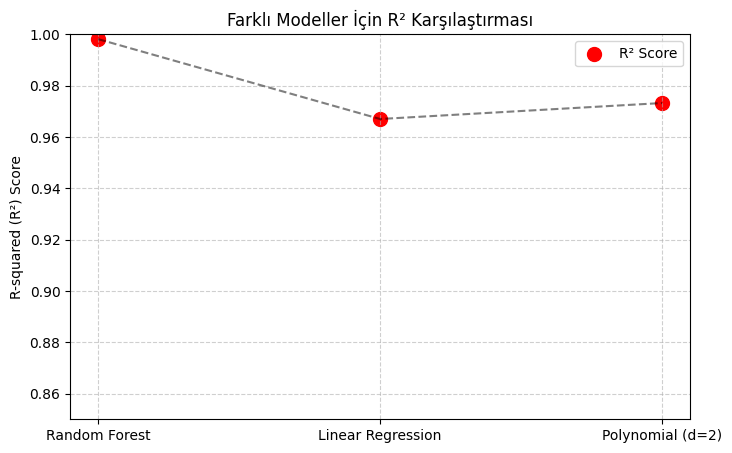

In [ ]:
import matplotlib.pyplot as plt

# Modeller ve R² skorları
models = ["Random Forest","Linear Regression", "Polynomial (d=2)"]
r2_values = [0.9980921060336719,0.9669880514783389, 0.9732121514615185]  

plt.figure(figsize=(8, 5))

# Noktaları çiz
plt.scatter(models, r2_values, color="red", label="R² Score", s=100)

# Bağlantı çizgisi ekleyelim
plt.plot(models, r2_values, linestyle="dashed", color="black", alpha=0.5)

plt.ylabel("R-squared (R²) Score")
plt.title("Farklı Modeller İçin R² Karşılaştırması")
plt.ylim(0.85, 1)  # Daha iyi görünmesi için sınırları belirleyelim
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


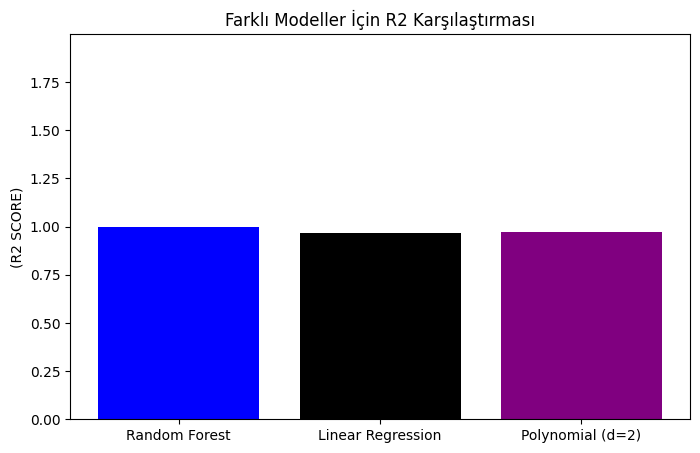

In [124]:
# RMSE değerlerini içeren listeler
models = ["Random Forest","Linear Regression", "Polynomial (d=2)"]
r2_values = [0.9980921060336719,0.9669880514783389, 0.9732121514615185]  

plt.figure(figsize=(8, 5))
plt.bar(models, r2_values, color=["blue","black", "purple"])
plt.ylabel("(R2 SCORE)")
plt.title("Farklı Modeller İçin R2 Karşılaştırması")
plt.ylim(0, max(r2_values) + 1)
plt.show()


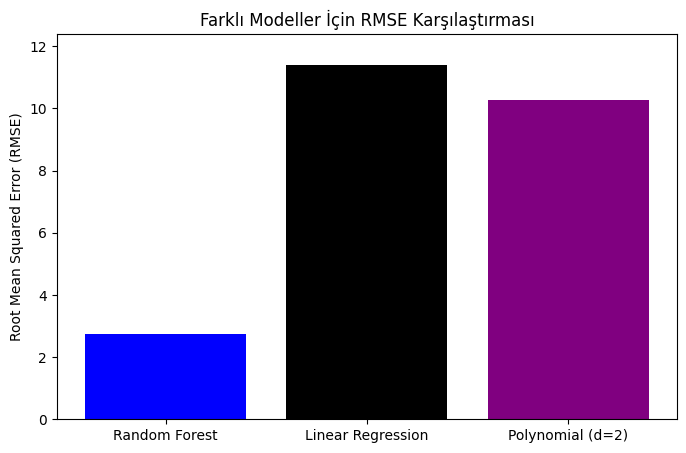

In [126]:
import matplotlib.pyplot as plt

# RMSE değerlerini içeren listeler
models = ["Random Forest","Linear Regression", "Polynomial (d=2)"]
rmse_values = [2.737647505919392,11.387699300983938, 10.258156692156595]  # Burada hesaplanan RMSE değerlerini yazmalısın

plt.figure(figsize=(8, 5))
plt.bar(models, rmse_values, color=["blue","black", "purple"])
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Farklı Modeller İçin RMSE Karşılaştırması")
plt.ylim(0, max(rmse_values) + 1)
plt.show()


# Sonuç Olarak

Random Forest yönteminin hem lineer hem de poly e nazaran daha iyi çalıştığı gözlemlenmiştir